In [1]:
# Usual imports
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18, 10)
import seaborn as sns
sns.set()
import tensorflow as tf

We start by loading all the data saved after milestone 2.1

In [2]:
data = np.load('../data/chinese_traffic_sign_dataset_2.npz')

# Put everything in different variables (don't keep predictions and adversarial images in lists)
train_X = data['train_X']
valid_X = data['valid_X']
train_Y = data['train_Y']
valid_Y = data['valid_Y']
pred_base = data['pred_base']
pred_noise = data['pred_noise']
pred_fgsm = data['pred_fgsm']
pred_pgd = data['pred_pgd']
valid_X_uniform_noise = data['valid_X_uniform_noise']
valid_X_fgsm = data['valid_X_fgsm']
valid_X_pgd = data['valid_X_pgd']

### Input dataset

We start by plotting the confusion matrix and the count plot for the validation images and the prediction of our model

(-0.5, 54.5, 54.5, -0.5)

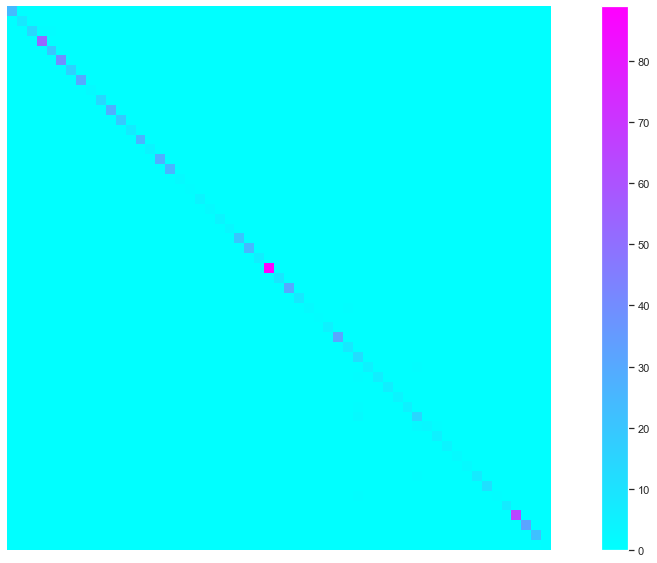

In [3]:
cm_base = confusion_matrix(valid_Y.argmax(axis=1), pred_base.argmax(axis=1))
fig, axes = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_base)
disp.plot(ax=axes, cmap = 'cool', include_values=False)
axes.axis('off')

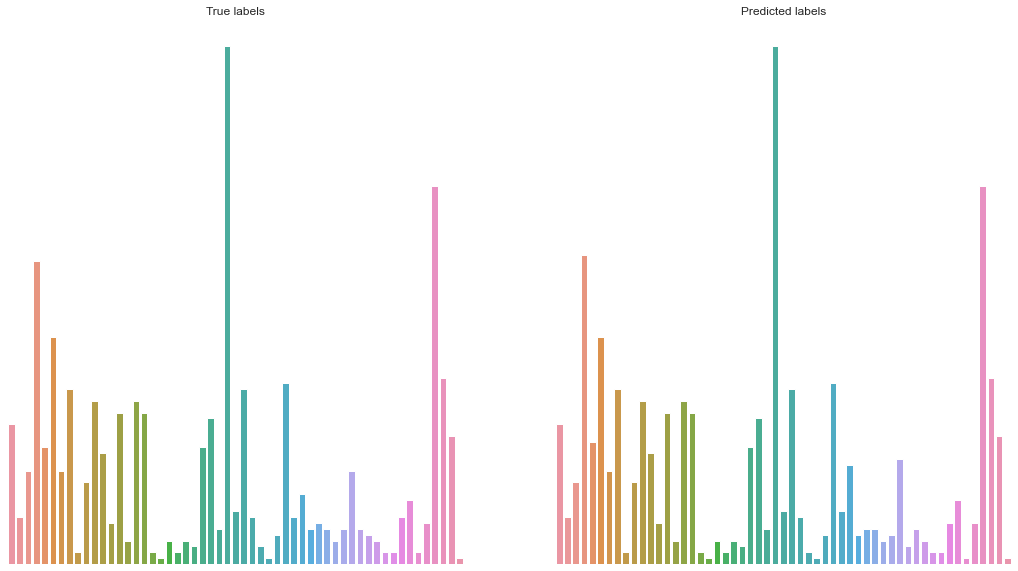

In [4]:
df_base = pd.DataFrame({'Valid_data':valid_Y.argmax(axis=1), 'Predictions':pred_base.argmax(axis=1)})
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Valid_data',data=df_base, ax=axes[0])
axes[0].set_title('True labels')
axes[0].axis('off')

sns.countplot(x='Predictions',data=df_base, ax=axes[1])
axes[1].set_title('Predicted labels')
axes[1].axis('off')

plt.show()

### FGSM Attack

We now repeat the same plot for the adversarial images created with the FGSM method

(-0.5, 54.5, 54.5, -0.5)

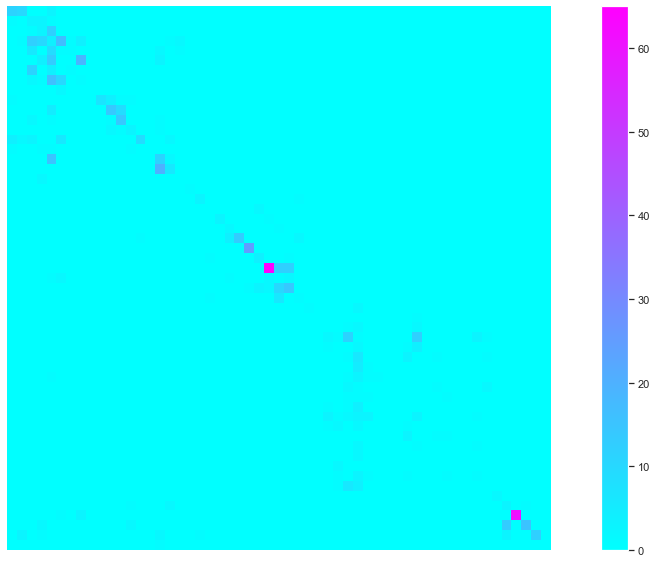

In [5]:
cm_fgsm = confusion_matrix(valid_Y.argmax(axis=1), pred_fgsm.argmax(axis=1))
fig, axes = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_fgsm)
disp.plot(ax=axes, cmap = 'cool', include_values=False)
axes.axis('off')

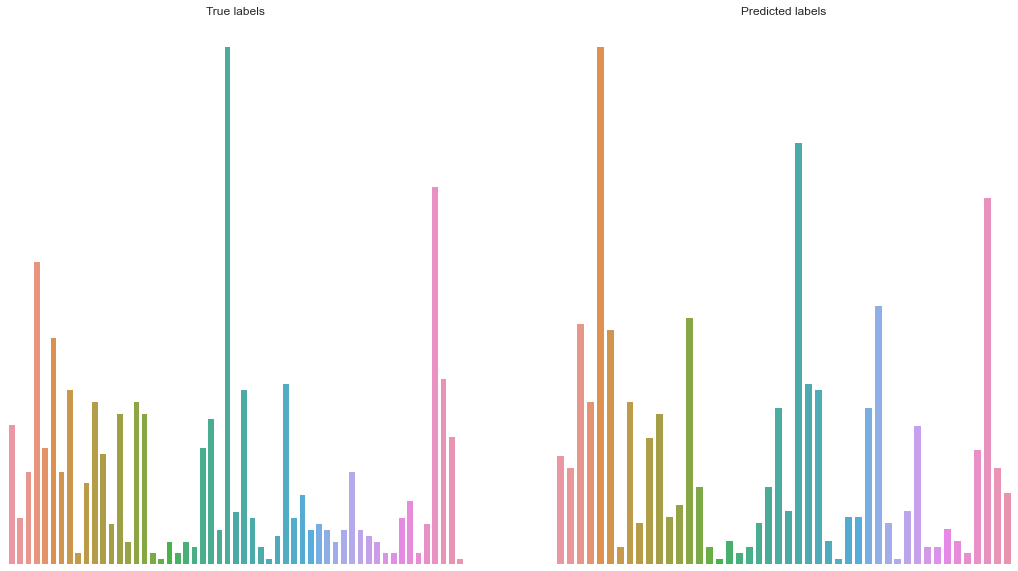

In [6]:
df_fgsm = pd.DataFrame({'Valid_data':valid_Y.argmax(axis=1), 'Predictions':pred_fgsm.argmax(axis=1)})
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Valid_data',data=df_fgsm, ax=axes[0])
axes[0].set_title('True labels')
axes[0].axis('off')

sns.countplot(x='Predictions',data=df_fgsm, ax=axes[1])
axes[1].set_title('Predicted labels')
axes[1].axis('off')

plt.show()

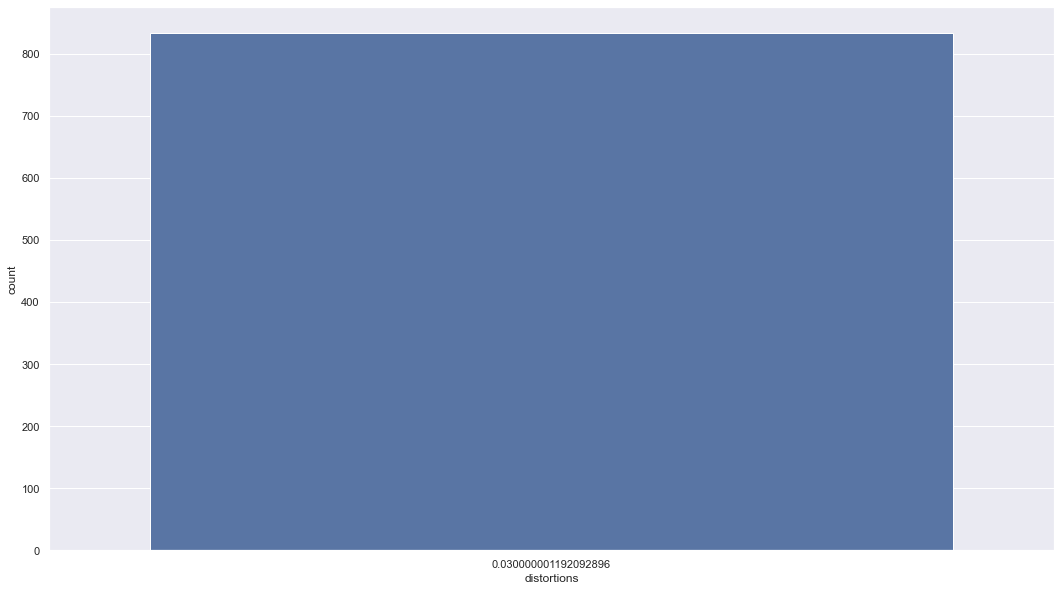

In [7]:
diff_fgsm = valid_X - valid_X_fgsm
distortions = [tf.norm(diff_fgsm[i,:],ord=np.inf).numpy() for i in range(diff_fgsm.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions', data=df)
plt.show()

### PGD Attack

Same, but with PGD adversarial images. We created only 50 adversarial examples, so we limit the plot to only those examples 

In [8]:
num_samples = len(pred_pgd)

(-0.5, 35.5, 35.5, -0.5)

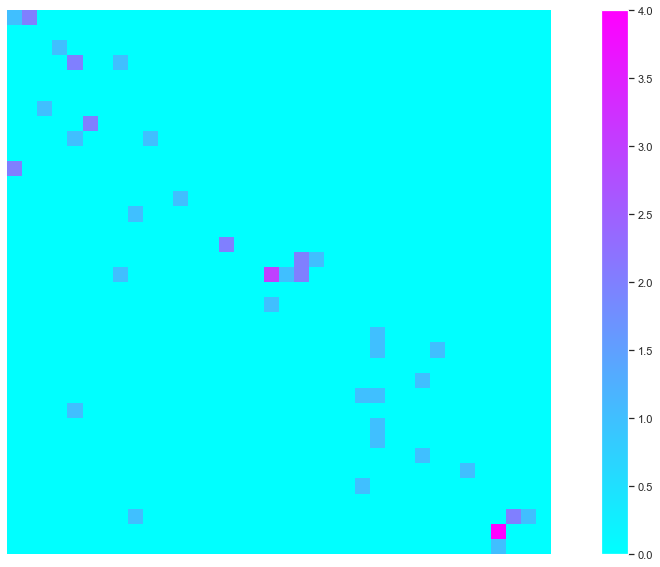

In [9]:
cm_pgd = confusion_matrix(valid_Y[:num_samples].argmax(axis=1), pred_pgd.argmax(axis=1))
fig, axes = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pgd)
disp.plot(ax=axes, cmap = 'cool', include_values=False)
axes.axis('off')

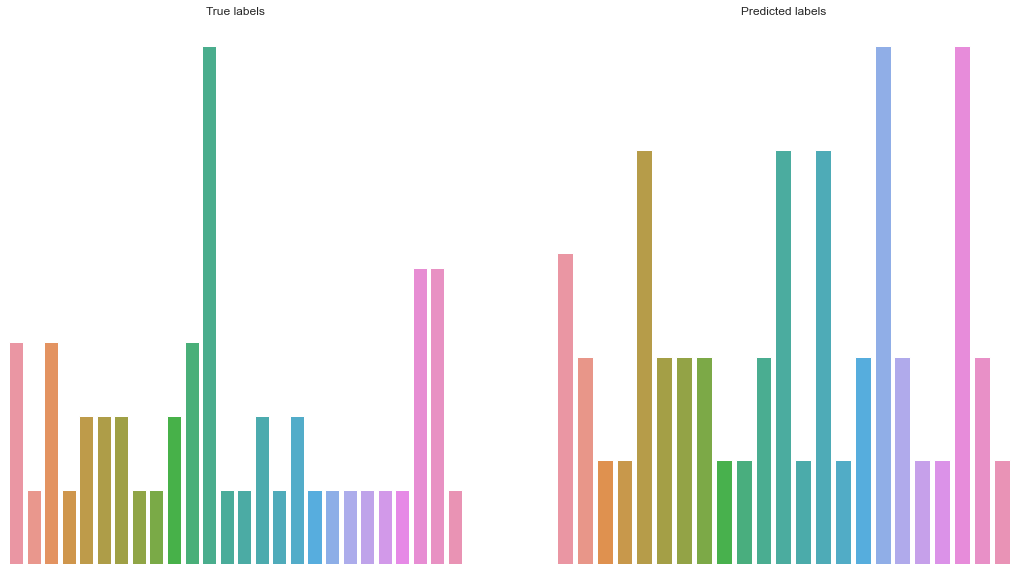

In [10]:
df_pgd = pd.DataFrame({'Valid_data':valid_Y[:num_samples].argmax(axis=1), 'Predictions':pred_pgd.argmax(axis=1)})
fig, axes = plt.subplots(1, 2)
sns.countplot(x='Valid_data',data=df_pgd, ax=axes[0])
axes[0].set_title('True labels')
axes[0].axis('off')

sns.countplot(x='Predictions',data=df_pgd, ax=axes[1])
axes[1].set_title('Predicted labels')
axes[1].axis('off')

plt.show()

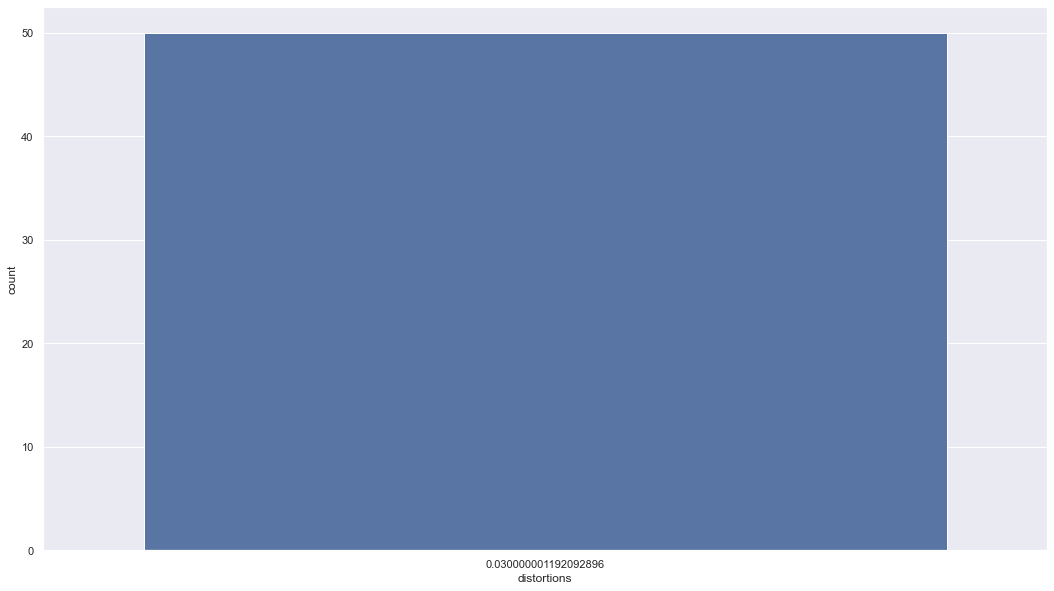

In [11]:
diff_pgd = valid_X[:num_samples] - valid_X_pgd
distortions = [tf.norm(diff_fgsm[i,:],ord=np.inf).numpy() for i in range(diff_pgd.shape[0])]
df = pd.DataFrame({'distortions':distortions})
sns.countplot(x='distortions', data=df)
plt.show()